<a href="https://colab.research.google.com/github/salv0304/Colab/blob/main/Copia_di_Attivit%C3%A0_Ottica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relazione Attività Ottica**

In [ ]:
import numpy as np
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib.pyplot as plt  
from google.colab import files
import pandas as pd
from google.colab import files
from scipy.optimize import curve_fit 

##Esperimento 1

L'attività ottica di una soluzione è descritta dalla **Legge di Biot**: 

 $\alpha=kcL$

dove
* $\alpha$ è l'angolo di rotazione (positivo per un mezzo destrogiro, negativo per un mezzo levogiro);
* $k$ è il potere rotatorio specifico;
* $c$ è la concentrazione della soluzione;
* $L$ è la lunghezza di propagazione nel materiale.





###Misure in funzione di $L$

Nella prima parte di questo esperimento fittiamo $k$ per il saccarosio attraverso la legge $\alpha=kcL$, con $c= \frac{39g}{80ml}$.

 Ricordando che $k$ dipende dalla lunghezza d'onda $\lambda$, lavoriamo a lunghezza d'onda fissata. Noi abbiamo lavorato con un led giallo di $\lambda=580 nm$.

<ipython-input-26-e7e6f5ce9684>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati=np.loadtxt("exp1_L_alfa.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
<ipython-input-26-e7e6f5ce9684>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati = dati.astype(np.float)


\L (cm) 		Angolo (deg)
1.7 	 3.0
3.4 	 6.5
5.1 	 12.0
7.0 	 15.5
8.9 	 20.0
10.4 	 24.0
11.7 	 28.0


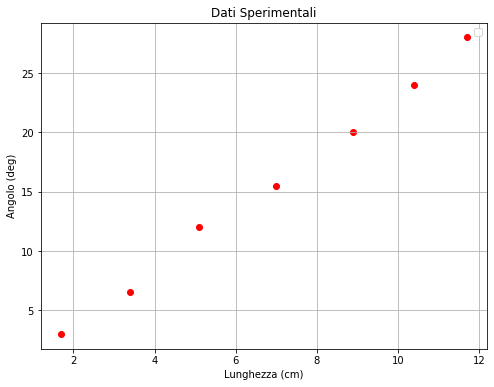

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("exp1_L_alfa.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
L=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\L (cm) \t\tAngolo (deg)")
for i in range(len(L)):
  print(L[i],"\t",angolo[i])


plt.scatter(L, angolo, color='red')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Lunghezza (cm)")
plt.ylabel("Angolo (deg)")
plt.legend()

In [ ]:
def retta(l,k):
    alfa= k*40/80*l ##La concentrazione c= 40g/80ml
    return alfa

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(k, print_output=True, plot_guess=False):
 
  guess = np.array([k]) #array of initial guesses
  bounds = ([-np.inf], [np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, L, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(L)
  plt.figure(figsize=[10,6])
  xmin,xmax=L[0],L[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0])
  plt.xlabel('Lunghezza (cm)', fontsize=20)
  plt.ylabel('Angolo (deg)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(L,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["k"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

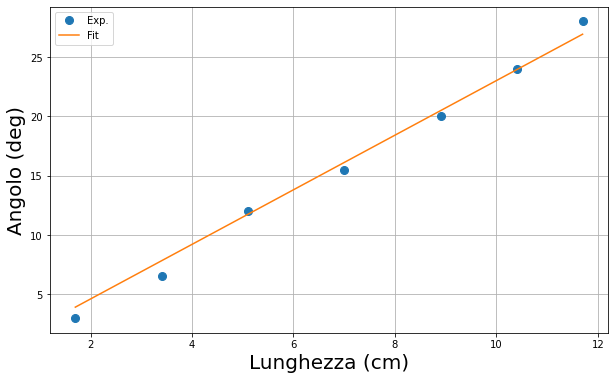

          k = 4.6026297994 +- 0.0843758444




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(6)

###Misure in funzione del Peso

Per una misurazione meno soggetta ad errore sperimentale e quindi più precisa, possiamo maneggiare la legge di Biot per fittare $k$ con la formula $\alpha=\frac{kP}{S}$ dove $S$ è la sezione del cilindro graduato in cui versiamo la soluzione e $P$ il peso del soluto.

<ipython-input-18-c54d132f908d>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati=np.loadtxt("exp1_P_alfa.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
<ipython-input-18-c54d132f908d>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati = dati.astype(np.float)


\Peso (g) 		Angolo (deg)
10.3 	 10.0
20.5 	 21.5
30.7 	 33.0
39.0 	 41.0
51.0 	 53.0


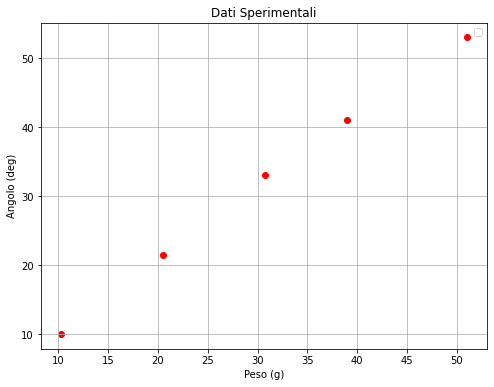

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("exp1_P_alfa.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
P=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\Peso (g) \t\tAngolo (deg)")
for i in range(len(P)):
  print(P[i],"\t",angolo[i])


plt.scatter(P, angolo, color='red')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Peso (g)")
plt.ylabel("Angolo (deg)")
plt.legend()

In [ ]:
def retta(p,k):
    alfa= k*p/5.72 ##La sezione misurata è di 5.72 cm
    return alfa

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(k, print_output=True, plot_guess=False):
 
  guess = np.array([k]) #array of initial guesses
  bounds = ([-np.inf], [np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, P, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(P)
  plt.figure(figsize=[10,6])
  xmin,xmax=P[0],P[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0])
  plt.xlabel('Peso (g)', fontsize=20)
  plt.ylabel('Angolo (deg)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(P,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["k"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

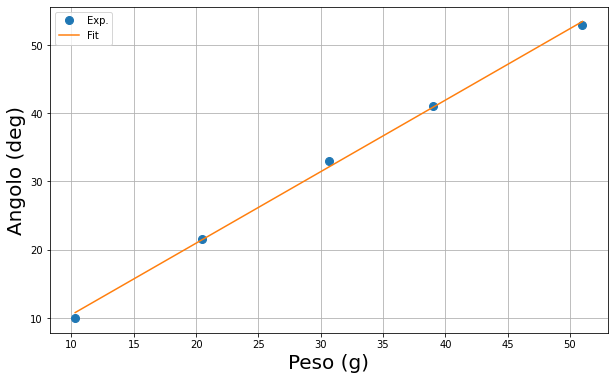

          k = 5.9942123082 +- 0.0473328353




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(5)

##Esperimento 2

Nel secondo esperimento vogliamo studiare la dipendenza di $k$ dalla lungheza d'onda $\lambda$ secondo la legge $k(\lambda)=\frac{A}{\lambda^2}$. Fissiamo $P$ e visto che $S$ è costante ricaviamo $k=\frac{\alpha S}{P}$, variamo $\lambda$ e calcoliamo $A=k\lambda^2$. Confrontiamo in ultimo i valori di $k$ a $\lambda=589 nm$ stimati dai nostri dati sperimentali con i valori tabulati.

###Saccarosio

Per il saccarosio otteniamo i valori

\begin{array}{|c|c|c|c|}
\hline
\lambda (nm) & \alpha (deg) & k (deg*cm^2/g ) & A (deg*cm^2*\mu m^2/g)\\
\hline
468 &74 &10.452 & 2.29  \\
\hline
525 &55 &7.768 &2.14  \\
\hline
580 &  43 &6.073 &2.04 \\
\hline
630 & 39 & 5.509 & 2.19 \\
\hline
\end{array}

quindi i risutati di $A$ sono 

\begin{array}{|c|c|}
\hline
Media & Deviazione Standard\\
\hline
2.165 & 0.104\\
\hline
\end{array}



In [ ]:
#Saccarosio
k=2.165/((0.589)**2)
print(k)
dev=0.104/(0.589)**2
print(dev)

6.240613857333514
0.29978006520216416


Abbiamo otenuto $k=(6.24 \pm 0.30) (deg*cm^2/g)$, in accordo entro $2\sigma$ con il valore tabulato $k=6.65 (deg*cm^2/g)$. 

###Fruttosio

Per il fruttosio otteniamo i valori

\begin{array}{|c|c|c|c|}
\hline
\lambda (nm) & \alpha (deg) & k (deg*cm^2/g ) & A (deg*cm^2* \mu m^2/g)\\
\hline
468 & -105&-14.940 & -3.27  \\
\hline
525 &-84 &-11.952 &-3.29  \\
\hline
580 & -65 &-9.249 & -3.11 \\
\hline
630 & -60 & -8.537 & -3.38 \\
\hline
\end{array}


Quindi i risultati di $A$ sono

\begin{array}{|c|c|}
\hline
Media & Deviazione Standard\\
\hline
-3.270 & 0.144\\
\hline
\end{array}

In [ ]:
##fruttosio
k=-3.270/(0.589)**2
dev=0.144/(0.589)**2
print(k)
print(dev)

-9.42577705010651
0.41508009027991966


Abbiamo otenuto $k=(-9.43 \pm 0.42) (deg*cm^2/g)$, in accordo entro $1\sigma$ con il valore tabulato $k=-9.12 (deg*cm^2/g)$. 

###Glucosio

Per il glucosio otteniamo i valori

\begin{array}{|c|c|c|c|}
\hline
\lambda (nm) & \alpha (deg) & k (deg*cm^2/g ) & A (deg*cm^2* \mu m^2/g)\\
\hline
468 & 53&14.645 & 3.21  \\
\hline
525 &42 &11.606 &3.20  \\
\hline
580 & 33 &9.119 & 3.07 \\
\hline
630 & 28 & 7.737 & 3.07 \\
\hline
\end{array}

Quindi i valori di A sono


\begin{array}{|c|c|}
\hline
Media & Deviazione Standard\\
\hline
3.138*10^6 & 0.076\\
\hline
\end{array}


In [ ]:
##Glucosio non eq
k=3.138/(0.589**2)
dev=0.076/(0.589**2)
print(k)
print(dev)

9.045286967349915
0.21907004764773538


Abbiamo otenuto $k=(9.05 \pm 0.22) (deg*cm^2/g)$, **NON**  in accordo con il valore tabulato $k=5.24 (deg*cm^2/g)$.

Ma questo, come vedremo nell'Esperimento 3, dipende dalla mutarotazione del glucosio, infatti $k=5.24 (deg*cm^2/g)$ è il valore valido per la soluzione in cui $\alpha$-D-glucosio e $\beta$-D-glucosio sono in equilibrio. Nella prossima parte daremo il risoltato corretto.

##Esperimento 3

Nel glucosio che utilizziamo non c'è equilibrio tra le due forme isomeriche. Utiliziamo acqua calda per velocizzare l'effetto di **mutarotazione**, cioè il processo nel quale le due forme isomeriche si trasformano una nell'altra fino al raggiungimento dell'equilibrio. 

Plottiamo l'angolo di rotazione in funzione del tempo (ad una lunghezza d'onda fissata $\lambda=589 nm$). 

<ipython-input-30-2c7a12392691>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati=np.loadtxt("exp3.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
<ipython-input-30-2c7a12392691>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati = dati.astype(np.float)


\Tempo (min) 		Angolo (deg)
0.0 	 37.0
2.0 	 35.0
4.0 	 33.0
6.0 	 31.0
8.0 	 30.0
10.0 	 29.0
12.0 	 28.0
14.0 	 27.0
16.0 	 26.0
19.0 	 25.0
22.0 	 24.0
25.0 	 24.0
28.0 	 23.0
30.0 	 23.0
50.0 	 23.0


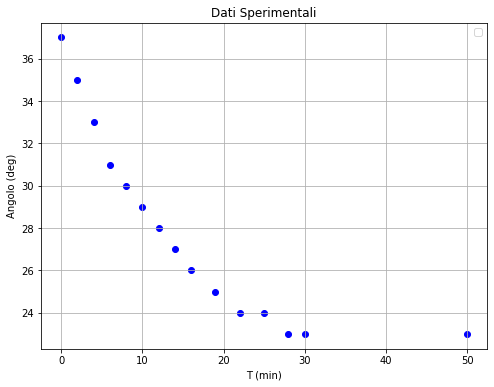

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("exp3.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
T=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\Tempo (min) \t\tAngolo (deg)")
for i in range(len(T)):
  print(T[i],"\t",angolo[i])


plt.scatter(T, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("T (min)")
plt.ylabel("Angolo (deg)")
plt.legend()

Fissiamo $\lambda$ e $P$. Dopo un tempo di circa 30 minuti la soluzione si stabilizza e presenta un angolo di rotazione di 23 gradi. A questo punto rifacciamo il lavoro svolto nel secondo esperimento:

Per il glucosio otteniamo i valori

\begin{array}{|c|c|c|c|}
\hline
\lambda (nm) & \alpha (deg) & k (deg*cm^2/g ) & A (deg*cm^2* \mu m^2/g)\\
\hline
468 & 35&8.073 & 1.65  \\
\hline
525 &27 &6.227 &1.72  \\
\hline
580 & 23 &5.305 & 1.78 \\
\hline
630 & 19 & 4.382 & 1.65 \\
\hline
\end{array}

Quindi i valori di A sono


\begin{array}{|c|c|}
\hline
Media & Deviazione Standard\\
\hline
1.713 & 0.073\\
\hline
\end{array}

In [ ]:
##glucosio eq
k=1.713/0.589**2
print(k)
dev=0.073/0.589**2
print(dev)

4.9377235739548775
0.2104225457669037


Abbiamo otenuto $k=(4.94 \pm 0.21) (deg*cm^2/g)$, in accordo entro $2\sigma$ con il valore tabulato $k=5.24 (deg*cm^2/g)$.

##Esperimento 4

Prepariamo una soluzione di saccarosio utilizzando acqua calda e qualche millilitro di $HCl$ al 25%. 

Poiché in soluzione acquosa il saccarosio si scinde in glucosio + fruttosio, il potere rotatorio cambierà. L'aggiunta di $HCl$ serve soltanto per catalizzare la reazione. A reazione completa la soluzione avrà un potere rotatorio negativo.

### Senza $HCl$

<ipython-input-34-05af5434a342>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati=np.loadtxt("exp4_0pipetta.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
<ipython-input-34-05af5434a342>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati = dati.astype(np.float)


\Tempo (min) 		Angolo (deg)
0.0 	 45.0
30.0 	 45.0
60.0 	 48.0
1340.0 	 40.0
1390.0 	 45.0
1445.0 	 45.0


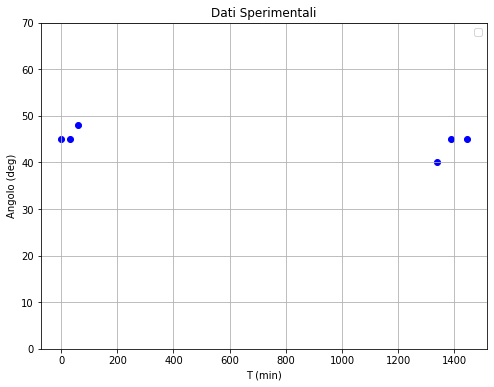

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("exp4_0pipetta.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
T=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\Tempo (min) \t\tAngolo (deg)")
for i in range(len(T)):
  print(T[i],"\t",angolo[i])


plt.scatter(T, angolo, color='blue')
plt.ylim(0,70)
plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("T (min)")
plt.ylabel("Angolo (deg)")
plt.legend()

Vediamo che in assenza di catalizzatore l'angolo di rotazione (e quindi $k$) resta costante nell'errore sperimentale.

###Reazione con l'aggiunta di una pipetta di $HCl$

<ipython-input-21-ad70055ea8aa>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati=np.loadtxt("exp4_1pipetta.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
<ipython-input-21-ad70055ea8aa>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati = dati.astype(np.float)


\Tempo (min) 		Angolo (deg)
0.0 	 42.0
30.0 	 37.0
60.0 	 35.0
1340.0 	 0.0
1390.0 	 0.0
1445.0 	 0.0


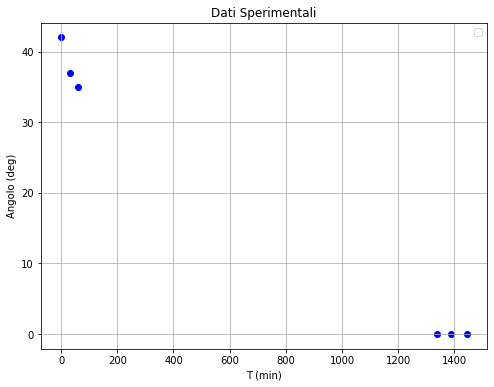

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("exp4_1pipetta.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
T=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\Tempo (min) \t\tAngolo (deg)")
for i in range(len(T)):
  print(T[i],"\t",angolo[i])


plt.scatter(T, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("T (min)")
plt.ylabel("Angolo (deg)")
plt.legend()

Dopo un giorno vediamo come l'angolo di rotazione è molto diminuito, stabilendosi a zero.

###Soluzione con l'aggiunta di tre pipette di $HCl$

<ipython-input-22-10e62159bff1>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati=np.loadtxt("exp4_3pipetta.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
<ipython-input-22-10e62159bff1>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati = dati.astype(np.float)


\Tempo (min) 		Angolo (deg)
0.0 	 40.0
30.0 	 30.0
60.0 	 24.0
1340.0 	 -15.0
1390.0 	 -10.0
1445.0 	 -12.0


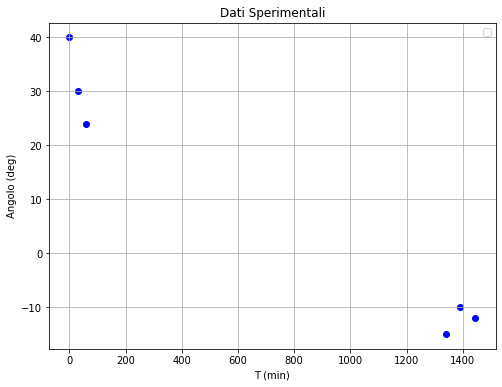

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("exp4_3pipetta.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
T=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\Tempo (min) \t\tAngolo (deg)")
for i in range(len(T)):
  print(T[i],"\t",angolo[i])


plt.scatter(T, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("T (min)")
plt.ylabel("Angolo (deg)")
plt.legend()

Vediamo come l'angolo di rotazione è molto diminuito, stabilendosi intorno ai -12 gradi dopo un giorno. In questo ultimo caso riusciamo a vedere come sia avvenuta l'inversione del potere rotatorio.